# QFT (Quantum Fourier Transform)
implementing QFT circuit for 3 Qubit and Validating Using Inverse QFT.
What we learned in this notebook :
- Understanding the intuition behind the Quantum Fourier Transform.
- constructing a **QFT Circuit for 3 Qubit** step-by-step
- Understanding why each quantum gate is used
- Implementing **Inverse QFT**  and Verifying Correctness
- Visualizing Circuit and Simulation result.

## What is QFT?
The **QFT(Quantum Fourier Transform)** is the one of the most importtant Quantum Algorithm in quantum computing. It is the **Quantum** equivalant of the classical **Discret Fourier Transform(DFT)** but it is exponentially faster.

#### Why QFT in Important?
- In classical computing ,the DFT Transform the signal from the time domain to frequency domain. similarly, the QFtT transforms quntum state from **computational basis** to **frequency(Phase)** Basis. 
- Qunatum computer performs QFT in $ O(n) {^2} $   steps while ,classical computer requires $ O(2) {^n} $ operations for DFT.

Because of this efficiency ,QFT is the crucial subroutine in man major quantum algorithm.

#### what does QFT actually do?
- qunatum state of 'n' qubit can represent numbers from 0 to $ 2{^n} $-1.
- If your system is in basis state |x> ,the QFT transform it into Superposition:
$$ 
\text{QFT}|x\rangle = \frac{1}{\sqrt2^n} \sum_{k=0}^{2^n-1} e^{2\pi i xk / 2^n} |k\rangle
$$
**QFT** encodes the number **x** into **phase** so the information is captured in rotation angle of qubits.

## Import Required Libraries

In [19]:

from qiskit import QuantumCircuit,transpile
from qiskit_aer import AerSimulator
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.circuit import Instruction

## Helper : Controlled Phase Rotation
QFT uses a rotation gates:
$$ 
R_k=\begin{bmatrix} 1 & 0 \\ 0 & e^{2\pi i / 2^k} \end {bmatrix}
$$
Controllerd $ R_k $ gates  is used to encode phase relationship between qubits.
This function applies a  **controlled Phase Rotation** Where:
- 'Control' $ \rightarrow $ qubit applying the control
- 'Target' $ \rightarrow $ qubit receieved the rotation.
- 'K' $ \rightarrow $ level of rotation (phase =$ 2\pi / 2^k $ )

In [27]:
def apply_controlled_phase(qc,control,target,k,inverse=False):
    angle = 2 * np.pi / (2**k)
    if inverse:
        angle=-angle
    qc.cp(angle,control,target)

## Implement QFT for 3 Qubits (Step-by -Step)

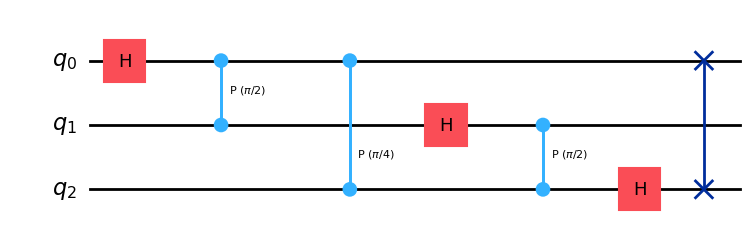

In [28]:
def qft_3qubit():
    qc=QuantumCircuit(3,name='QFT')

    # Step 1- Apply Hadamard Gate to qubit 0 for creating equal superposition and prepare for the phase encoding.
    qc.h(0)

    # Step 2- Controlled Rotation 
    apply_controlled_phase(qc,1,0,2)
    apply_controlled_phase(qc,2,0,3)

    # Step 3 -Apply Hadamard gate to qubit 1
    qc.h(1)

    #  Step 4 -Controlled rotation between qubit 2 --> 1
    apply_controlled_phase(qc,2,1,2)

    # Step 5 -Apply Hadamard to qubit 2
    qc.h(2)

    #Step 6 - swap qubit 0 and 2(QFT output ordering)
    qc.swap(0,2)

    return qc
qft_circuit=qft_3qubit()
qft_circuit.draw('mpl')  

### Why this Steps?
- **Hadamard Gate** - They create a superposition that allows phase information to be added.
- **Controlled Phase Rotations** - These encode relative phase diffrence between Qubits,which is the core of the fourier tranform.
- **Swap Gate** - QFT reverses qubit order ,so swap gate fix the ordering

## Inverse QFT for 3-qubits

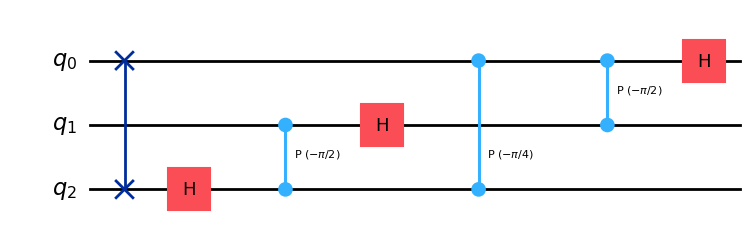

In [33]:
def inverse_qft_3qubits():
    qc=QuantumCircuit(3,name='inverse\n QFT')

    # Reverse the QFT Steps
    qc.swap(0,2)

    # Undo Hadamard + Rotation
    qc.h(2)
    apply_controlled_phase(qc,2,1,2,inverse=True)

    qc.h(1)
    apply_controlled_phase(qc,2,0,3,inverse=True)
    apply_controlled_phase(qc,1,0,2,inverse=True)

    qc.h(0)
    return qc
inv_qft_circuit=inverse_qft_3qubits()
inv_qft_circuit.draw('mpl')




## Test: Apply the QFT then inverse QFT
This should ideally return the original state.we test using input state |5> (in binary 101). let first create circut then we apply QFT on this circuit after thar we apply inverse QFT on test circuit.

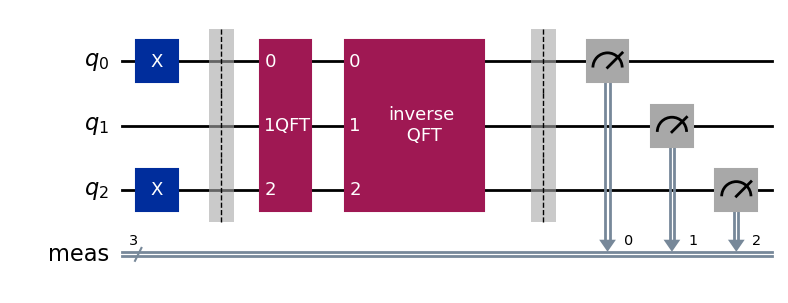

In [34]:

# Create a test circuit
qc_test =QuantumCircuit(3)
# Prepare state |101> =5
qc_test.x(0)
qc_test.x(2)
qc_test.barrier()

# Apply QFT 
qft_circuit=Instruction(name='QFT',num_qubits=3,num_clbits=0,params=[])
qft_circuit.definition=qft_3qubit
qc_test.append(qft_3qubit().to_gate(),[0,1,2])

#Apply Inverse QFT
qft_circuit=Instruction(name='Inverse \nQFT',num_qubits=3,num_clbits=0,params=[])
qft_circuit.definition=inverse_qft_3qubits
qc_test.append(inverse_qft_3qubits().to_gate(),[0,1,2])

# measure the Circuit
qc_test.measure_all()

# visualize the circuit
qc_test.draw('mpl')

## Simulate and Check output


In [35]:
sim=AerSimulator()
qc_test_demo=transpile(qc_test,sim)
result=sim.run(qc_test_demo,shots =1024).result()
counts= result.get_counts()
counts

{'101': 1024}

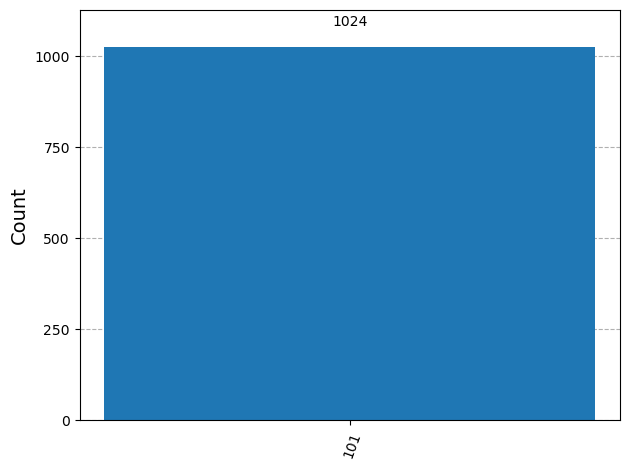

In [36]:
plot_histogram(counts)

#### Expected Output:
You Should see counts heavily concentrate on 101 with 1024 shots meaning is the QFT followed by inverse QFT returened us to the original state.

## Summery:
in this notebook we learned the implementation and working of 3- qubit QFT .QFT is the core building block in many quantum algorithm like:
- Shor's Algorithm 
- Quantum Phase Estimation
- Quantum signal processing
- various variational and metrology alogorithm

---

**Author:** *Shreya Palase*  

**Date Created:**  *10-Dec-2025*

**project:** Quantum-Computing-coding

**File:** day17_QFTCircuit.ipynb

Thank you and Keep Learning!

<sub>© Shreya Palase- All Rights Reserved.This notbook is part of a structured learning series designed for Github publication.</sub>